# Uppgift 02

Det är fritt fram att använda externa bibliotek i uppgiften.
Vänligen lämna in uppgiften som en Python notebook ```02_[förnamn]_[efternamn].ipynb```, ersätt med egna namn; Använda ```02_[person01]_[person02].ipynb```, ifall ni lämnar in som par.


## Part 1

- Bygg ett beslutsträd för HR som stödjer applikations filtrering.
- Använda historiska data som finns i ```hr_train_1.csv```
- Beslutsträdet skall sätta flaggan ```‘ignore’:True``` på sökande som inte är intressanta för HR avdelning.
    - Ni kan börja utifrån koden nedan, eller från koden i ```Data Science from Scratch``` som finns tillgänglig på: [Google Colab](https://colab.research.google.com/drive/1aNHPiVqt9FGmDSeeeQnr7vImMHYzyWBK?usp=sharing) alternativt [Github](https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/decision_trees.py)

- Testa ert beslutsträd på följande fyra personer och presentera resultaten.

| Experience | Programming | Tweets | PhD |
|:-----:|:-----:|:---:|:---:|
| Senior | Java | with tweets  | no PhD  |
| Senior | Python | no tweets | with PhD |
| Mid | Java | with tweets | no PhD |
| Junior | Python | with tweets | no PhD |


## Part 2
**Utforska** reglerna för beslutsträdet ni skapat.

Motivera era insikter för HR avdelningen.

*Ni kan till exempel hitta följande:*
- Hur många resultat finns det totalt med den data som nu finns?
- Vilken är den *kortaste* vägen för beslutsträdet att acceptera/avböja en sökande
- Finns det trender eller fördelar som en sökande kan ha i ert beslutsträd?
    - *Tips: Använd datautforskning (EDA) och hitta sedan insikter!*


## Part 3
*Föreställ er nu att HR avdelningen börjat samla mer data i form av sökandes kön. Lägg till kolumnen ```gender``` i er data och fyll det med slumpmässiga värden (0, 1, 2). Hur kan du tillverka ett test som demonstrerar att ditt beslutsträd är partiskt och att ca 2/3 av alla med kön ```2``` kommer bli flaggade för ```‘ignore’:True```. Visa denna partiskhet för HR avdelningen och förklara för eller emot den*

- Lägg till kolumnen ```gender``` i er data och fyll den med slumpmässiga värden
- Bevisa att två tredjedelar av kön(*gender*) ```2``` kommer bli flaggade med ```‘ignore’:True``` i ditt test.
- Kan du förklara eller motförklara detta med hjälp av data utforskning och motivera ditt svar mot HR avdelningen
    - *Tips: Prova dela upp din data i test/train (20%/80%)*

In [ ]:
# imports
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

[Text(0.5, 0.5, 'gini = 0.0\nsamples = 4\nvalue = 4.0')]

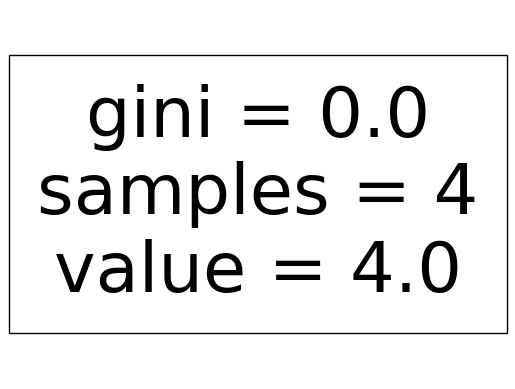

In [ ]:
# Modiferat exempel från w3
# https://www.w3schools.com/python/python_ml_decision_tree.asp

eggs = [
 {"Age": 36,"Experience": 10,"Rank": 9,"Nationality": "UK","Go": "NO"},
 {"Age": 42,"Experience": 12,"Rank": 4,"Nationality": "USA","Go": "NO"},
 {"Age": 23,"Experience": 4,"Rank": 6,"Nationality": "N","Go": "NO"},
 {"Age": 52,"Experience": 4,"Rank": 4,"Nationality": "USA","Go": "NO"}
]

ham = pd.DataFrame.from_dict(eggs)

spam = {'UK': 0, 'USA': 1, 'N': 2}
ham['Nationality'] = ham['Nationality'].map(spam)
spam = {'YES': 1, 'NO': 0}
ham['Go'] = ham['Go'].map(spam)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = ham[features]
y = ham['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Din kod här:
## Du kan referea till koden ovan, eller ta bort den
## Tips: Börja med att läsa in rätt data från .csv filen

# path = '/content/hr_train_1.csv'

# data = pd.read_csv(path)

test = [
    {"level": "Senior", "lang": "Java", "tweets": "yes", "phd": "no"},
    {"level": "Senior", "lang": "Python", "tweets": "no", "phd": "yes"},
    {"level": "Mid", "lang": "Java", "tweets": "yes", "phd": "no"},
    {"level": "Junior", "lang": "Python", "tweets": "yes", "phd": "no"}
]

# df = pd.DataFrame(test)

# spam = {'Junior': 0, 'Mid': 1, 'Senior': 2}
# df['level'] = df['level'].map(spam)
# spam = {'yes': 1, 'no': 0}
# df['tweets'] = df['tweets'].map(spam)
# df['phd'] = df['phd'].map(spam)



# x = df.drop('lang', axis=1)
# y = df['lang']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# dtree = DecisionTreeClassifier(random_state=42)
# dtree.fit(x_train, y_train)

# y_pred = dtree.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

In [ ]:
df = pd.read_csv('hr_train_1.csv')

le = LabelEncoder()
df['level'] = le.fit_transform(df['level'])
df['lang'] = le.fit_transform(df['lang'])
df['tweets'] = le.fit_transform(df['tweets'])
df['phd'] = le.fit_transform(df['phd'])

x = df[['level', 'lang', 'tweets', 'phd']]
y = df['ignore']

dtree = DecisionTreeClassifier()
dtree.fit(x, y)

# python: 1, java: 0, R: 2
# levels i logisk ordning


applicants = pd.DataFrame({
    'level': [2, 2, 1, 0],
    'lang': [0, 1, 0, 1],
    'tweets': [1, 0, 1, 1],
    'phd': [0, 1, 0, 0]
})

print(df['lang'])


filtered = dtree.predict(applicants)

applicants['HR_filter'] = filtered
print(applicants)


0       0
1       0
2       1
3       1
4       2
       ..
1009    2
1010    2
1011    0
1012    0
1013    0
Name: lang, Length: 1014, dtype: int64
   level  lang  tweets  phd  HR_filter
0      2     0       1    0      False
1      2     1       0    1      False
2      1     0       1    0      False
3      0     1       1    0       True


In [ ]:
test_applicants = pd.DataFrame({
    'level': [2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0],
    'lang': [0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2],
    'tweets': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
    'phd': [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
})

filtered2 = dtree.predict(test_applicants)

test_applicants['HR_filter'] = filtered2
print(test_applicants.sort_values(by='level'))
print(test_applicants.sort_values(by='lang'))


    level  lang  tweets  phd  HR_filter
3       0     1       1    0       True
7       0     0       0    0       True
11      0     0       0    0       True
12      0     2       1    0      False
2       1     2       1    0       True
6       1     1       1    0      False
10      1     1       1    0      False
0       2     0       1    0      False
1       2     1       0    1      False
4       2     2       1    0       True
5       2     2       0    1      False
8       2     2       1    0       True
9       2     2       1    1      False
    level  lang  tweets  phd  HR_filter
0       2     0       1    0      False
7       0     0       0    0       True
11      0     0       0    0       True
1       2     1       0    1      False
3       0     1       1    0       True
6       1     1       1    0      False
10      1     1       1    0      False
2       1     2       1    0       True
4       2     2       1    0       True
5       2     2       0    1      False


Kortaste vägen är engligt deras experience, alla Juniors vill HR ha genast. Gällde även i de första provkaninerna. HR tycker även om Seniors som använder R som man märker när den är sorted by langauge, men om Seniorn i fråga har en PhD vill dom inte ha dem. Jag testade också att ändra så en av Mid arbetarna hade R istället och då ville HR ha den. Mest vikt är det i språket och erfarenhet, lite  i PhD om det är en senior. Intressant nog så är det en Junior med R så tyckte  HR inte om dem.